In [2]:
from tbparse import SummaryReader
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def fix_display():
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000


def get_eval(reader):
    tensors = reader.tensors
    filtered_steps = tensors[~tensors['tag'].str.contains('eval')]
    filtered_steps = filtered_steps[filtered_steps['step'] == tensors['step'].max()]
    eval = filtered_steps[['tag', 'value']]
    return eval


def get_train_time(reader):
    tensors = reader.tensors
    steps_max = tensors['step'].max()
    steps_sum = tensors[tensors['tag'] == 'steps_per_sec'].value.sum()
    step_count = tensors[tensors['tag'] == 'steps_per_sec'].value.count()
    mean_step_per_sec = steps_sum / step_count
    train_time_minutes = steps_max / mean_step_per_sec / 60
    return round(train_time_minutes, 2)


In [64]:
#BEST
models = [
    ['centernet_hg104_512x512_coco17_tpu-8_100_b2', 'CenterNet Hourglass104'],
    ['centernet_mobilenetv2fpn_512x512_coco17_od_test_lr2', 'CenterNet MobileNetV2'],
    ['efficentdet_d0_512_50_b8', 'EfficentDet D0'],
    ['efficentdet_d1_640_b4_50','EfficentDet D1'],

    ['faster_rcnn_resnet50_v1_640x640_150', 'Faster RCNN ResNet50 v1'],
    ['my_ssd_mobnet_100', 'SSD MobileNetV2 FPNLite'],
    ['ssd_mobilenet_v2_fpnlite_640px_b4_100', 'SSD MobileNetV2 FPNLite 640'],
    ['ssd_mobnet_v2_zwykly_320px_b8_100_lr1', 'SSD MobileNetV2 320'],
    ['ssd_resnet50_v1_fpn_640_b2_100_l2', 'SSD ResNet50 v1 FPN'],
]
    # ['ssd_mobnet_v2_zwykly_320px_b4_50_sett1','SSD MobileNetV2 320'],

In [66]:
def get_train_loss(reader):
    tensors = reader.tensors
    # print(tensors.tags)
    # loss_all = tensors[tensors['tag'] == 'Loss/total_loss'].value
    # loss_all = tensors[tensors['tag'] == 'DetectionBoxes_Precision/mAP'].value
    loss_all = tensors[tensors['tag'] == 'DetectionBoxes_Recall/AR@1'].value
    # print(loss_all)
    # for x in set([x for x in tensors['tag']]):
    #     loss_all = tensors[tensors['tag'] == x].value
    #     y = [a for a in loss_all]
    #     print(x, len(y))
    
    steps_all = tensors['step']
    loss = [float(x) for x in loss_all]
    steps = [int(x) for x in steps_all]
    steps = sorted(list(set(steps)))
    return loss, steps


result = []
for i, (model, model_name) in enumerate(models):
    eval_dir = os.path.join(f'Tensorflow/workspace/models/{model}/eval')
    train_dir = os.path.join(f'Tensorflow/workspace/models/{model}/train')
    reader_train = SummaryReader(eval_dir)
    loss, steps = get_train_loss(reader_train)
    result.append([loss, steps, model_name])

CenterNet Hourglass104
CenterNet MobileNetV2
EfficentDet D0
EfficentDet D1
Faster RCNN ResNet50 v1
SSD MobileNetV2 FPNLite
SSD MobileNetV2 FPNLite 640
SSD MobileNetV2 320
SSD ResNet50 v1 FPN


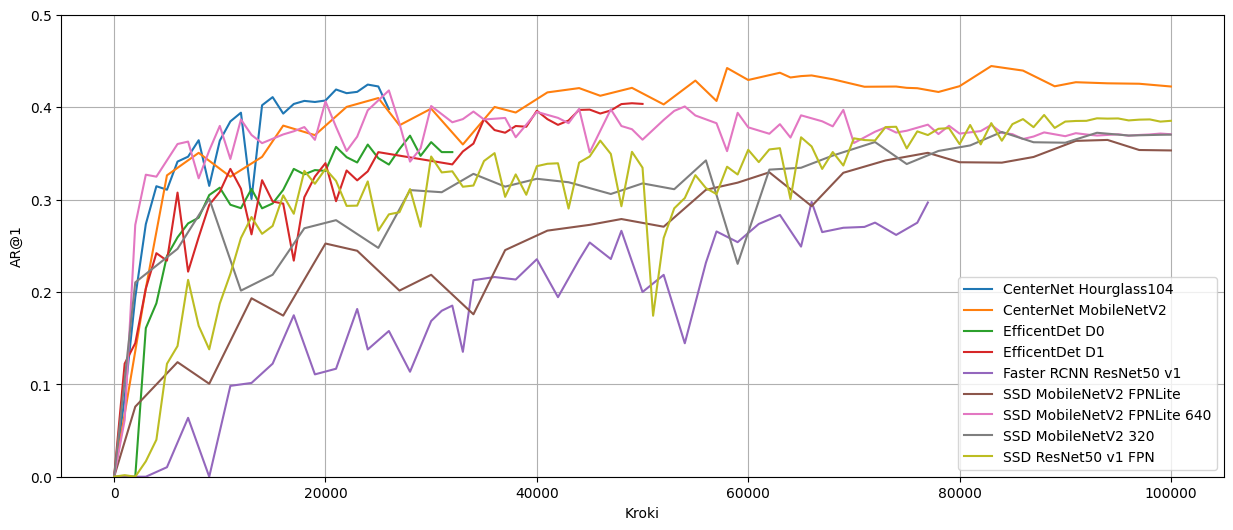

In [70]:
plt.figure(figsize=(15, 6))
plt.ylim(0, .5)  # Set y-axis limit once

for loss, steps, model_name in result:
    print(model_name)
    if model_name == "EfficentDet D0" or  model_name == "EfficentDet D0":
        loss = loss[:-2]
    plt.plot(steps, loss, label=model_name)  # Specify label for each line

plt.xlabel("Kroki")
plt.ylabel("AR@1")
plt.legend()  # Show legends for model names
# plt.title("Loss Over Training Steps for Different Models")
plt.grid(True)  # Add a grid
plt.show()